In [1]:
from scipy.stats import poisson
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1

Сортируем по возрастанию, минимальное и максимальное значение соответственно а и b

(можно ECDF построить и посмотреть, насколько получается прямая. Если нет, попробовать построить линейную функцию по двум точкам из выборки так, чтобы все значения выборки попадали в значения внутри это прямой)

# 2 

In [2]:
n = 17
rv = poisson(n)

In [3]:
df = pd.DataFrame({}, columns=['mean error', 'var error'])
for i in range(15):
    sample = rv.rvs(size=100)
    df = df = df.append({'mean error': abs(sample.mean() - n),
                         'var error':abs(sample.std()**2 - n)},
                  ignore_index=True)

In [4]:
df

,mean error,var error
0,0.21,0.5141
1,0.17,2.0589
2,0.03,1.2491
3,0.45,0.8925
4,0.54,2.8484
5,0.66,2.1356
6,0.16,1.0856
7,0.29,2.1141
8,0.59,3.1219
9,0.26,0.9124


In [5]:
for i, j in df.T.iterrows():
    print(i, '=', j.mean())

mean error = 0.3446666666666668
var error = 1.6061666666666667


In [6]:
df1000 = pd.read_csv('breast_cancer_1000_genes.tsv', sep='\t', index_col=0)
df_key = pd.read_csv('breast_cancer_key_genes.tsv', sep='\t', index_col=0)

# 3 

# 4 

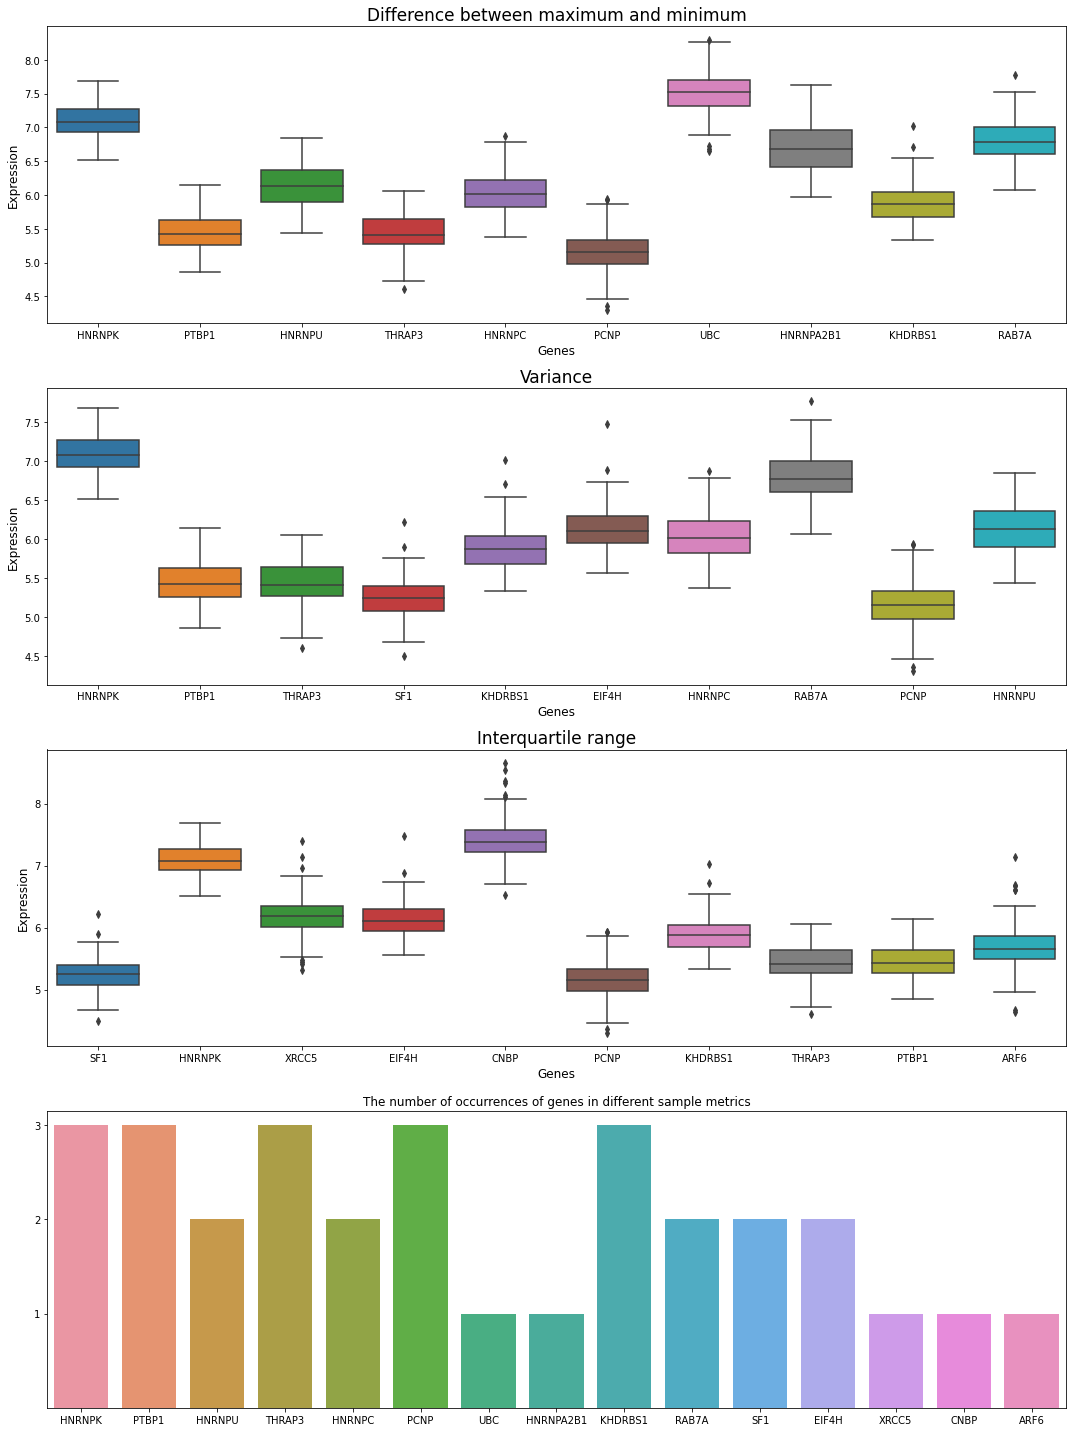

In [7]:
df = pd.DataFrame()
df['Difference between maximum and minimum'] = df1000.max(axis=1) - df1000.min(axis=1)
df['Variance'] = df1000.std(axis=1)**2
df['Interquartile range'] = df1000.quantile(.75, axis=1) - df1000.quantile(.25, axis=1) 

fig, ax = plt.subplots(4, 1, figsize=(15, 20))
axes = [i for i in range(4)]
plots = {}

for i, j in zip(df.columns, axes):
    tmp = df.sort_values(i).iloc[:10].index
    for k in tmp:
        plots[k] = plots.get(k, 0) + 1
    sns.boxplot(data=df1000.loc[tmp].T, ax=ax[j])
    
    ax[j].set_title(i, size=17)
    ax[j].set_xlabel('Genes', size=12)
    ax[j].set_ylabel('Expression', size=12)

sns.barplot(x=list(plots.keys()), y=list(plots.values()), ax=ax[axes[-1]])
ax[axes[-1]].set_title('The number of occurrences of genes in different sample metrics')
ax[axes[-1]].set_yticks([i for i in range(1, 4)])
plt.tight_layout()
plt.savefig('boxplots_1000')

# 5 

In [8]:
df_key.head()

,ESR1,PGR,ERBB2,MKI67
TCGA-3C-AAAU-01A,3.691075,2.975339,5.043666,3.314383
TCGA-3C-AALI-01A,0.336400,0.110920,9.717665,3.107031
TCGA-3C-AALJ-01A,4.688752,1.291904,5.630728,2.085183
TCGA-3C-AALK-01A,3.221422,2.930038,7.311545,2.298665
TCGA-4H-AAAK-01A,4.355086,3.867628,5.844283,2.416418


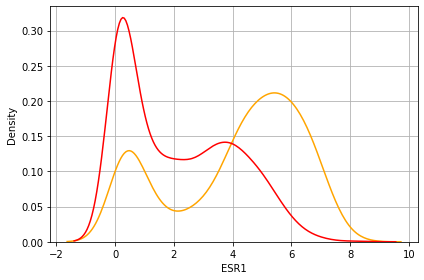

In [9]:
sns.kdeplot(x=df_key["ESR1"], color='orange')
sns.kdeplot(x=df_key["PGR"], color='red')
plt.grid()
plt.tight_layout()

<AxesSubplot:xlabel='PGR', ylabel='Density'>

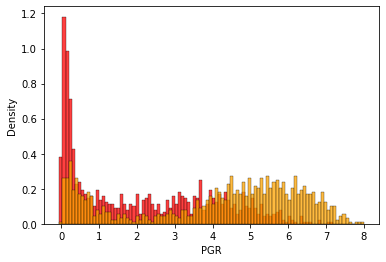

In [10]:
sns.histplot(data=df_key['PGR'], binrange=(-0.05, 8), bins=100, stat='density', color='red')
sns.histplot(data=df_key['ESR1'], binrange=(-0.05, 8), bins=100, stat='density', color='orange')